In [38]:
import pandas as pd
df = pd.read_csv('islander_data.csv')

exp_sample = df.groupby('Drug').sample(30, replace=True)
print(exp_sample.value_counts('Drug'))

Drug
A    30
S    30
T    30
Name: count, dtype: int64


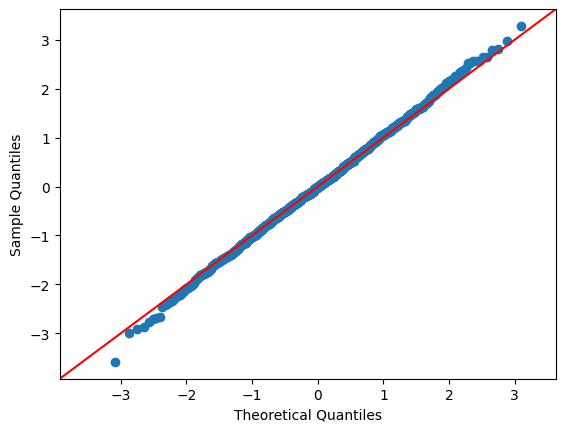

In [39]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

normal_data = np.random.normal(0,1, 1000)

sm.qqplot(normal_data, line='45')
plt.show()

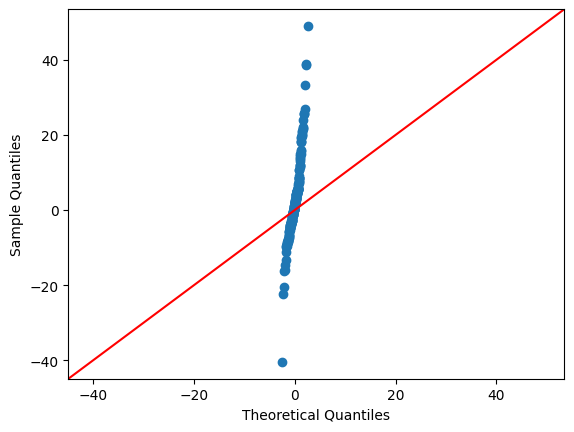

In [40]:
sm.qqplot(df['Diff'], line='45') #проверяем нормальность распределения. по красной линии - идеал нормального
plt.show()

<Axes: title={'center': 'Diff'}, xlabel='Happy_Sad_group'>

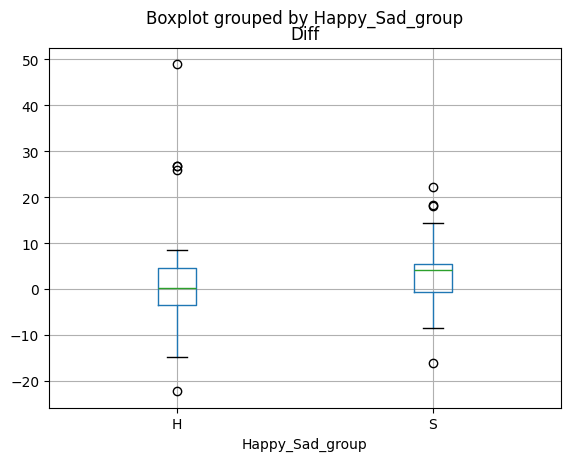

In [41]:
exp_sample.boxplot(by = 'Happy_Sad_group', column =['Diff'], grid = True)

<Axes: title={'center': 'Diff'}, xlabel='Drug'>

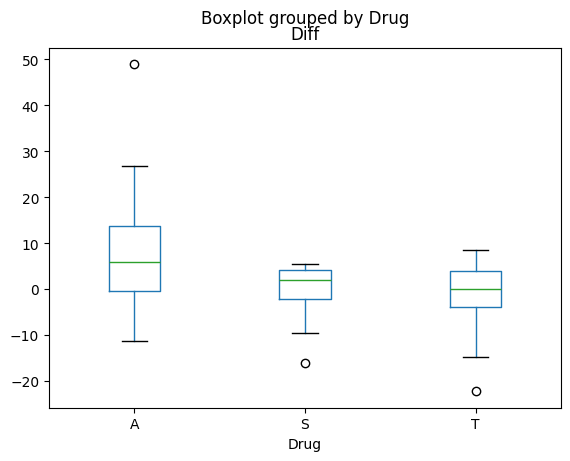

In [42]:
exp_sample.boxplot(by = 'Drug', column =['Diff'], grid = False)


(<Figure size 640x480 with 3 Axes>, {('1', 'H'): (0.0, np.float64(0.0), 0.35203520352035206, np.float64(0.4360465116279069)), ('1', 'S'): (0.0, np.float64(0.43936877076411956), 0.35203520352035206, np.float64(0.5606312292358804)), ('2', 'H'): (0.356985698569857, np.float64(0.0), 0.385038503850385, np.float64(0.37019458946369244)), ('2', 'S'): (0.356985698569857, np.float64(0.3735168485999051), 0.385038503850385, np.float64(0.6264831514000948)), ('3', 'H'): (0.746974697469747, np.float64(0.0), 0.253025302530253, np.float64(0.65000722230247)), ('3', 'S'): (0.746974697469747, np.float64(0.6533294814386825), 0.253025302530253, np.float64(0.3466705185613173))})


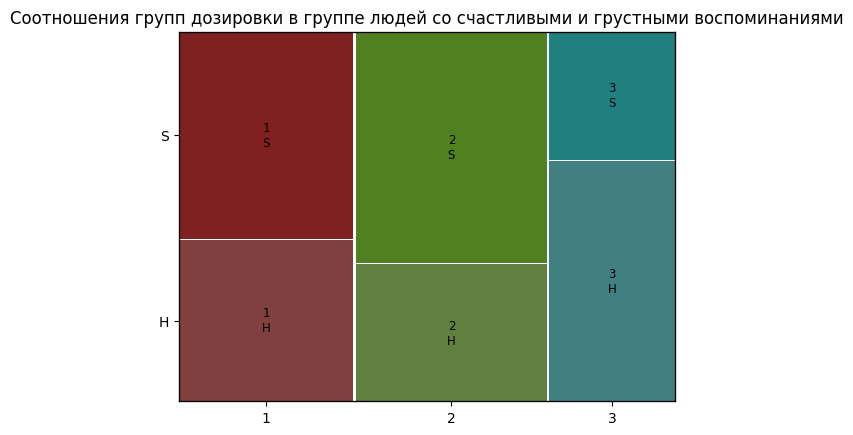

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
print(mosaic(exp_sample, ['Dosage','Happy_Sad_group'], title = 'Соотношения групп дозировки в группе людей со счастливыми и грустными воспоминаниями'))

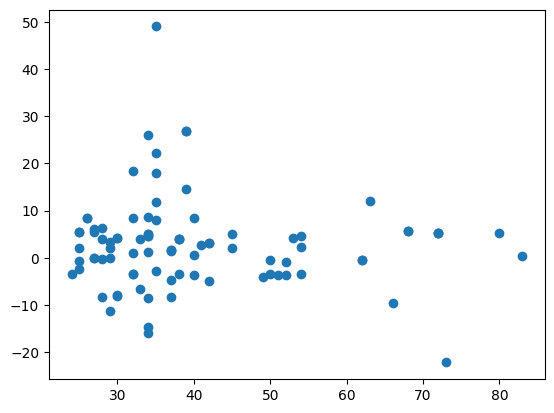

In [44]:
plt.scatter(exp_sample['age'], exp_sample['Diff'])
plt.show()

In [45]:
k, b = np.polyfit(exp_sample['age'], exp_sample['Diff'], 1) # линейная регрессия

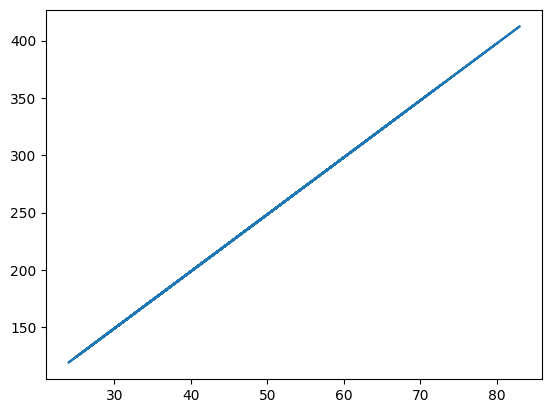

In [46]:
plt.plot(exp_sample['age'], k*(exp_sample['age'])+b*exp_sample['age'] )

In [47]:
a = np.corrcoef(df['age'], df['Diff'], 1)[0][1]
a

np.float64(-0.009293328126756118)

In [48]:
import pandas as pd
df = pd.read_csv('Patient Survival.csv')
df = df.groupby('Treated_with_drugs').sample(500)
# df.shape
df = df[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Diagnosed_Condition', 'Survived_1_year']]
print(df.shape)

(1000, 5)


In [49]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

nm = np.random.normal(0, 1, 1000)

# sm.qqplot(df['Diagnosed_Condition'], line='45')
df['Diagnosed_Condition'].max()

np.int64(52)

In [50]:
from scipy.stats import shapiro # Критерий Шапиро - проверяем нормальность распределения среднего выборки
n = 0                           # H0 - распределено нормально. далее в ттесте есть отдельный флаг для этого
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9963400326597376), pvalue=np.float64(0.3085581802359988))

In [51]:
n = 0
nums = []
while n < 500:
    n += 1
    sample = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition'].mean()
    nums.append(sample)
shapiro(nums)

ShapiroResult(statistic=np.float64(0.9978654831812515), pvalue=np.float64(0.787054879783837))

In [52]:
from scipy.stats import levene # критейрий левена. H0 - дисперсии одинаковы в выборках
s1 = df[df['Patient_Smoker'] == 'NO'].sample(100)['Diagnosed_Condition']
s2 = df[df['Patient_Smoker'] == 'YES'].sample(100)['Diagnosed_Condition']
levene(s1, s2)


LeveneResult(statistic=np.float64(1.629696902338725), pvalue=np.float64(0.20324020188764677))

In [53]:
from scipy.stats import ttest_ind
ttest_ind(df[df['Patient_Smoker'] == 'NO']['Diagnosed_Condition'], df[df['Patient_Smoker'] == 'YES']['Diagnosed_Condition'], equal_var=True)

TtestResult(statistic=np.float64(-0.2034266314908049), pvalue=np.float64(0.8388430552181851), df=np.float64(998.0))

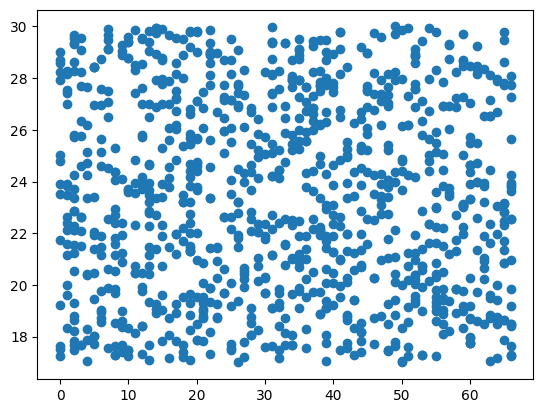

In [54]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])

array([[ 1.        , -0.04215014],
       [-0.04215014,  1.        ]])

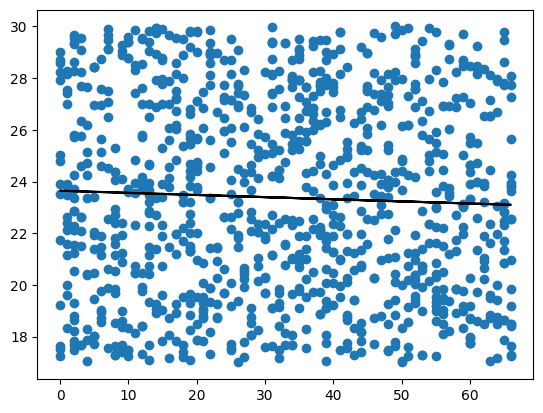

In [55]:
plt.scatter(df['Patient_Age'], df['Patient_Body_Mass_Index'])
a, b = np.polyfit(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'], deg=1)
plt.plot(df['Patient_Age'], a*df['Patient_Age'] + b, color='black')
q = np.corrcoef(x = df['Patient_Age'], y = df['Patient_Body_Mass_Index'])
# plt.show()
q

In [56]:
df = pd.read_csv('Spotify_Youtube.csv')

df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()
df['Duration'] = df['Duration_ms'] / 1000
df = df[(df['Duration'] < 300) & (df['Duration'] > 30)]
# np.nan(df['Duration'])

# df.columns

In [57]:
df = df[['Duration_ms', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()

In [58]:
print(df.describe())

         Duration_ms  Danceability      Loudness   Speechiness        Energy
count   18646.000000  18646.000000  18646.000000  18646.000000  18646.000000
mean   206110.522150      0.626312     -7.536997      0.097840      0.638738
std     45703.952142      0.161589      4.577807      0.113562      0.213155
min     30985.000000      0.000000    -46.251000      0.000000      0.000055
25%    176144.000000      0.527000     -8.649750      0.035900      0.511000
50%    207264.500000      0.643000     -6.422000      0.051300      0.670000
75%    237559.000000      0.744000     -4.860000      0.107000      0.801000
max    299960.000000      0.975000      0.920000      0.964000      1.000000


In [59]:
import statsmodels.api as sm # Линейная регрессия.
from statsmodels.regression.linear_model import OLS

In [60]:
X = df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
X = sm.add_constant(X, prepend=False)  #добавляем b_0
Y = df['Duration_ms']

model = OLS(Y, X)
res = model.fit()
res.summary()
# R-squared — это коэффициент детерминации;
# колонка coef с коэффициентами b;
# колонка P>|t| с p_value — его мы используем для оценки значимости коэффициента.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.9
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.01e-189
Time:                        23:39:28   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18641   BIC:                         4.522e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.752e+04   2208.324    -12.463      0.000   -3.19e+04   -2.32e+04
Loudness      2039.6970    110.773     18.413      0.000    1822.572    2256.822
Speechiness  -3.976e+04   2953.889    -13.461      0.000   -4.56e+04    -3.4e+04
Energy       -3977.6190   2287.915     -1.739      0.082   -8462.141     506.903
const         2.452e+05   2711.798     90.402      0.000     2.4e+05     2.5e+05
==============================================================================
Omnibus:                       69.121   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.670
Skew:                          -0.147   Prob(JB):                     7.44e-16
Kurtosis:                       2.938   Cond. No.                         97.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

видно, что pvalue у energy что-то высокое, давайте его исключим

In [61]:
X = df[['Danceability', 'Loudness', 'Speechiness']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     300.2
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          2.43e-190
Time:                        23:39:28   Log-Likelihood:            -2.2609e+05
No. Observations:               18646   AIC:                         4.522e+05
Df Residuals:                   18642   BIC:                         4.522e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -2.727e+04   2203.625    -12.375   

R-squared совсем не поменялся - значит мы удалили верно ненужную переменну

In [62]:
X = df[['Danceability']]
Y = df['Duration_ms']

X = sm.add_constant(X, prepend=False)

model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Duration_ms   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.39
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           2.17e-12
Time:                        23:39:28   Log-Likelihood:            -2.2650e+05
No. Observations:               18646   AIC:                         4.530e+05
Df Residuals:                   18644   BIC:                         4.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability -1.454e+04   2068.706     -7.028   

А тут мы удалили слишком много, потому коэф стал слишком маленьким...

Проверим допущение о мультиколлинеарности. Переменные не должны быть коррелированы между друг другом. Мы можем использовать VIF (Variance Inflation Factor). Если он будет больше четырех (ещё одно консенсусное значение, такое же как p-value или минимальное число наблюдений в группе), то это значит, что эта переменная коррелирована с какой-то из присутствующих и её нужно убрать из модели.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Danceability', 'Loudness', 'Speechiness']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

        feature       VIF
0  Danceability  3.283729
1      Loudness  2.593200
2   Speechiness  1.822876


Логистическая регрессия

In [64]:

import pandas as pd
df = pd.read_csv('character_predictions_pose.csv')
df

,s_no,plod,name,title,male,culture,dateofbirth,dateofdeath,mother,father,...,isaliveheir,isalivespouse,ismarried,isnoble,age,numdeadrelations,booldeadrelations,ispopular,popularity,isalive
0,1,0.946,Viserys II Targaryen,NaN,True,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,False,NaN,False,False,NaN,11,True,True,0.605351,False
1,2,0.613,Walder Frey,Lord of the Crossing,True,Rivermen,208.0,NaN,NaN,NaN,...,NaN,True,True,True,97.0,1,True,True,0.896321,True
2,3,0.507,Addison Hill,Ser,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,True,NaN,0,False,False,0.267559,True
3,4,0.924,Aemma Arryn,Queen,False,NaN,82.0,105.0,NaN,NaN,...,NaN,False,True,True,23.0,0,False,False,0.183946,False
4,5,0.383,Sylva Santagar,Greenstone,False,Dornish,276.0,NaN,NaN,NaN,...,NaN,True,True,True,29.0,0,False,False,0.043478,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0.197,Luwin,NaN,True,Westeros,NaN,299.0,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,True,0.351171,False
1942,1943,0.013,Reek,NaN,True,NaN,NaN,299.0,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.096990,False
1943,1944,0.480,Symeon Star-Eyes,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.030100,True
1944,1945,0.363,Coldhands,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,NaN,0,False,False,0.130435,True


In [65]:
got = df[['isalive', 'male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]
print(got)


      isalive   male  ismarried  numdeadrelations  isnoble  popularity
0       False   True      False                11    False    0.605351
1        True   True       True                 1     True    0.896321
2        True   True      False                 0     True    0.267559
3       False  False       True                 0     True    0.183946
4        True  False       True                 0     True    0.043478
...       ...    ...        ...               ...      ...         ...
1941    False   True      False                 0    False    0.351171
1942    False   True      False                 0    False    0.096990
1943     True   True      False                 0    False    0.030100
1944     True   True      False                 0    False    0.130435
1945    False   True       True                 4     True    0.210702

[1946 rows x 6 columns]


преобразовываем в категориальные переменные

In [66]:
got['isalive'] = got['isalive'].astype('int')
got['male'] = got['male'].astype('int')
got['isnoble'] = got['isnoble'].astype('int')
got['ismarried'] = got['ismarried'].astype('int')
got

C:\Users\nomad\AppData\Local\Temp\ipykernel_17788\1358901465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['isalive'] = got['isalive'].astype('int')
C:\Users\nomad\AppData\Local\Temp\ipykernel_17788\1358901465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  got['male'] = got['male'].astype('int')
C:\Users\nomad\AppData\Local\Temp\ipykernel_17788\1358901465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,isalive,male,ismarried,numdeadrelations,isnoble,popularity
0,0,1,0,11,0,0.605351
1,1,1,1,1,1,0.896321
2,1,1,0,0,1,0.267559
3,0,0,1,0,1,0.183946
4,1,0,1,0,1,0.043478
...,...,...,...,...,...,...
1941,0,1,0,0,0,0.351171
1942,0,1,0,0,0,0.096990
1943,1,1,0,0,0,0.030100
1944,1,1,0,0,0,0.130435


Несбалансированность данных — свойство распределения категориальных данных, где один класс представлен существенно больше, чем все остальные в выборке.

<Axes: xlabel='isalive'>

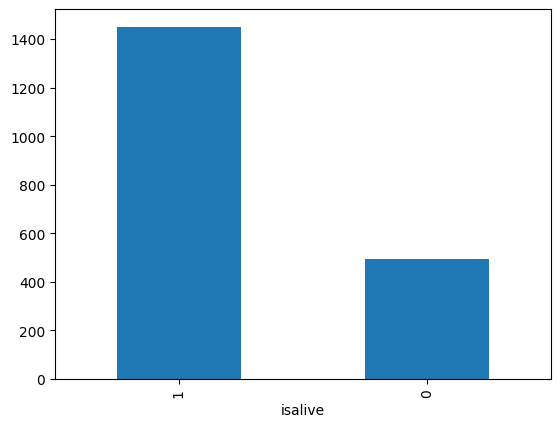

In [67]:
got['isalive'].value_counts().plot(kind='bar') #смотрим на распределение зависимой переменной


<Axes: xlabel='male'>

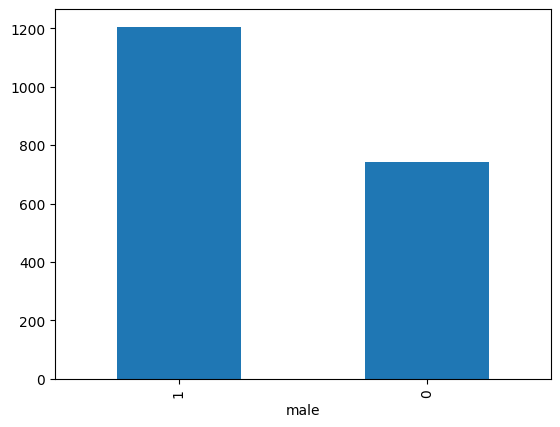

In [68]:
got['male'].value_counts().plot(kind='bar')

[Text(0.5, 1.0, 'Пропорция замужних персонажей'),
 Text(0.5, 0, 'Супруг(а) у персонажа'),
 Text(0, 0.5, 'Количество')]

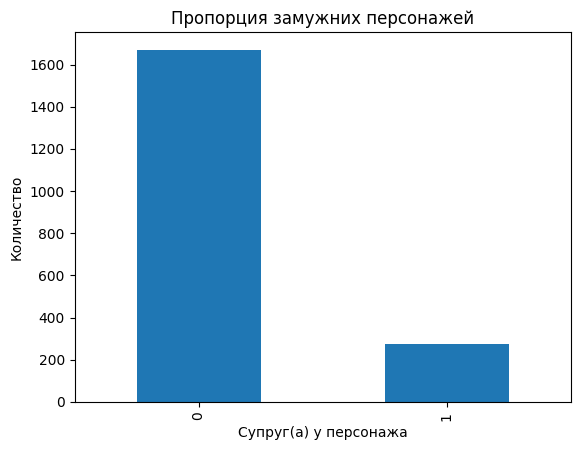

In [69]:
got['ismarried'].value_counts().plot(kind='bar').set(title='Пропорция замужних персонажей', xlabel='Супруг(а) у персонажа', ylabel='Количество')


корреляции чет не видно

In [70]:
np.corrcoef(got['popularity'], got['numdeadrelations'])[0, 1]

np.float64(0.614983783919864)

In [71]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence

In [72]:
model_1 = sm.GLM(
    got["isalive"],
    got["male"],
    family=families.Binomial(),
).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1945
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.3
Date:                Mon, 18 Nov 2024   Deviance:                       2508.6
Time:                        23:39:28   Pearson chi2:                 1.95e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1676
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.8257      0.063     13.190      0.0

In [73]:
model_2 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried"]],
    family=families.Binomial(),
).fit()
print(model_2.summary())

model_3 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations"]],
    family=families.Binomial(),
).fit()
print(model_3.summary())

model_4 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble"]],
    family=families.Binomial(),
).fit()
print(model_4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1944
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.0
Date:                Mon, 18 Nov 2024   Deviance:                       2498.0
Time:                        23:39:28   Pearson chi2:                 1.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1613
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
male           0.7780      0.064     12.126      0.0

In [74]:
model_5 = sm.GLM(
    got["isalive"],
    got[["male", "ismarried", "numdeadrelations", "isnoble", "popularity"]],
    family=families.Binomial(),
).fit()
print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                isalive   No. Observations:                 1946
Model:                            GLM   Df Residuals:                     1941
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.3
Date:                Mon, 18 Nov 2024   Deviance:                       2410.6
Time:                        23:39:29   Pearson chi2:                 1.99e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            -0.1103
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
male                 0.5746      0.081  

видим, что P у popularity высокое и это говорит, что эта переменная незначима => мы можем ее исключить

In [75]:
model_odds = pd.DataFrame(np.exp(model_5.params), columns= ['Odds Ratio'])
print(model_odds)

                  Odds Ratio
male                1.776362
ismarried           1.511153
numdeadrelations    0.781058
isnoble             1.892507
popularity          0.886407


Давайте их интерпретируем. Если Odds Ratio = 1, то отношения шансов равные для всех классов. Если Odds Ratio > 1, то отношения шансов при повышении значения переменной вырастает. Если Odds Ratio < 1*`, то отношения шансов при повышении значения переменной понижается.

К примеру, если персонаж мужчина — его шанс выжить повышается на 77,6%. Все, что идет после 1 в Odds Ratio можно интерпретировать как проценты.

Диагностика и надежность предсказания модели

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = got[['male', 'ismarried', 'numdeadrelations', 'isnoble', 'popularity']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0              male  1.732705
1         ismarried  1.270200
2  numdeadrelations  1.689705
3           isnoble  1.743861
4        popularity  2.244383


VIF должна быть менее консенсного 4 иначе у нас есть коллинеарность

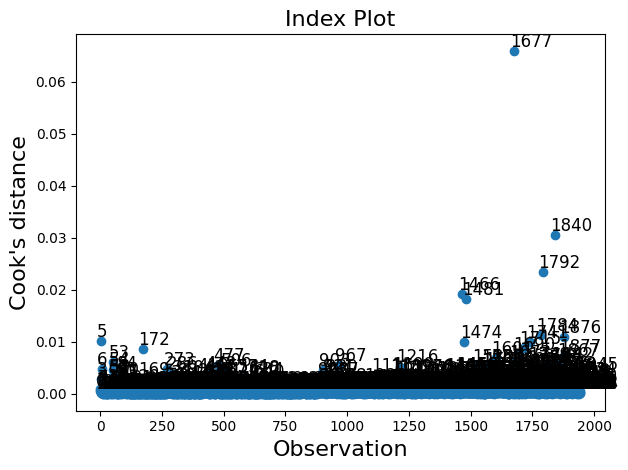

In [77]:
infl = model_5.get_influence()
fig = infl.plot_index(y_var="cooks")
fig.tight_layout()

In [78]:
from scipy import stats
m = stats.bernoulli(p=0.1)
pmf_values = m.pmf(1)
pmf_values


np.float64(0.1)

(0.0, 100.0)

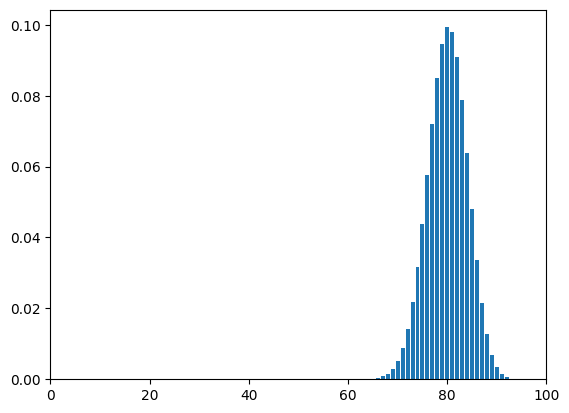

In [79]:
from scipy.stats import binom
n = 100
y = binom(n, p = 0.8)
x = np.arange(1, n)
y = y.pmf(x)
plt.bar(x, y)
# plt.ylim(0, 0.15)
plt.xlim(0, n)

In [ ]:
df = pd.read_csv('titanic.csv')


In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.loc[[1,5,10], ['Pclass', 'Sex']]

,Pclass,Sex
1,1,female
5,3,male
10,3,female


In [92]:
df['Age'].isna().sum()


np.int64(177)

In [106]:
df2 = pd.DataFrame(index=df.index)
df2['PassengerId'] = df['PassengerId'].copy(deep=True)
df2['evenId'] = df2['PassengerId'].apply(lambda x: x%2)
df_n = pd.merge(df2, df, how='inner', on='PassengerId')
df_n.head()

,PassengerId,evenId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df['Age'].count()

np.int64(714)

In [118]:
df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch',  'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: ylabel='Frequency'>

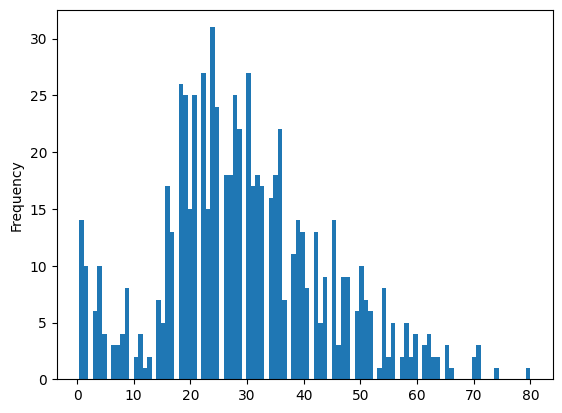

In [133]:
df['Age'].plot(kind='hist', bins=100)

<Axes: xlabel='Age'>

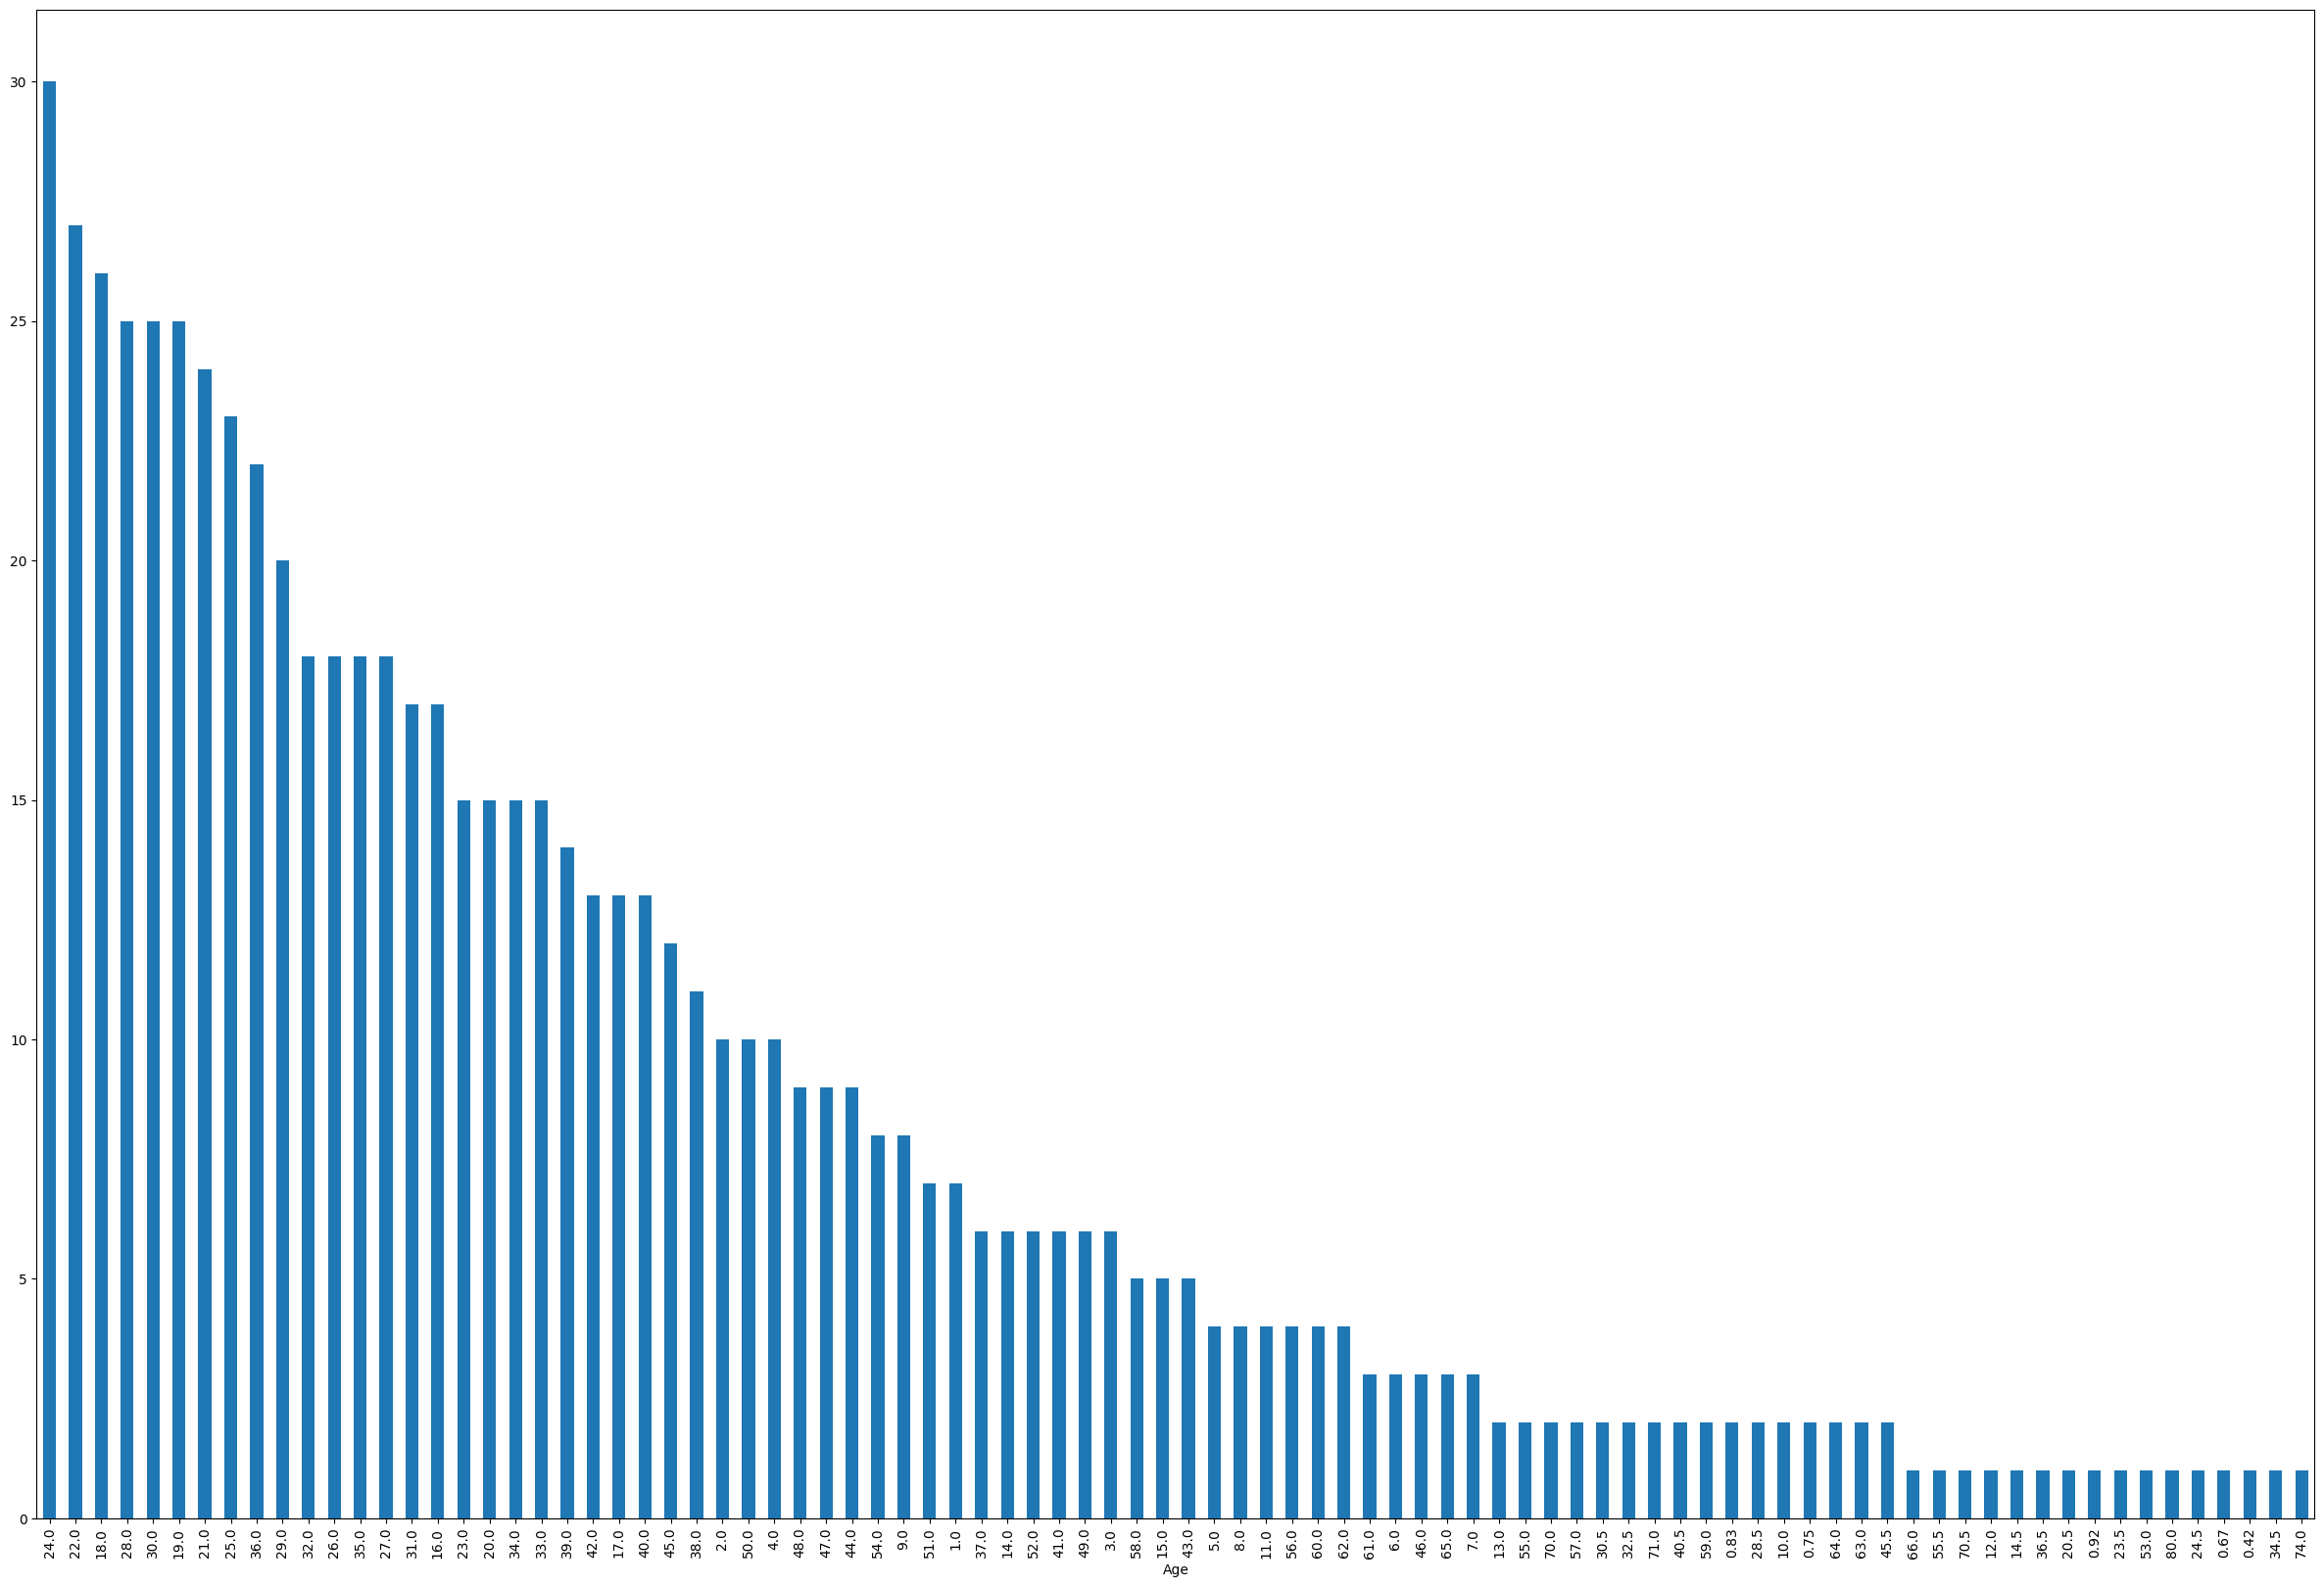

In [ ]:
df['Age'].value_counts().plot(kind='bar', figsize=(30, 20))

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

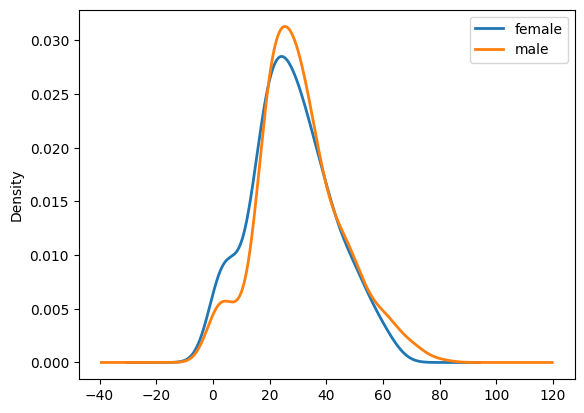

In [145]:
df.groupby('Sex')['Age'].plot(kind='kde', legend=True, linewidth=2)